## Alunos: Jod F. Pierre e Pierre R. Demosthène
## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [932]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [933]:
DataSet=pd.read_csv('arruela_.csv')

In [934]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [935]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [936]:
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,36,50,80,1,0
4,71,72,50,1,0


In [937]:
DataSet.describe()

,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,59.777778,63.697318,54.747126,0.375479,0.624521
std,17.293075,30.629366,35.548413,0.485177,0.485177
min,3.000000,6.000000,17.000000,0.000000,0.000000
25%,50.000000,46.000000,38.000000,0.000000,0.000000
50%,59.000000,56.000000,44.000000,0.000000,1.000000
75%,69.000000,68.000000,54.000000,1.000000,1.000000
max,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [938]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

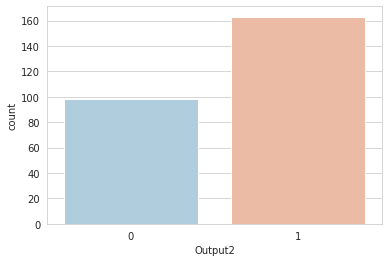

In [939]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

/home/jod/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


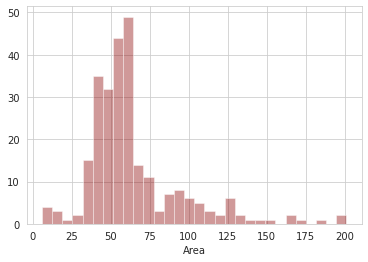

In [940]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

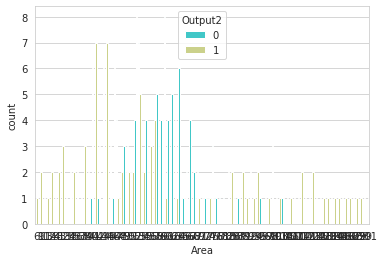

In [941]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

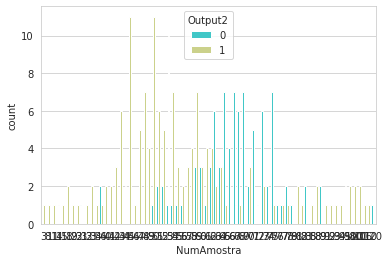

In [942]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

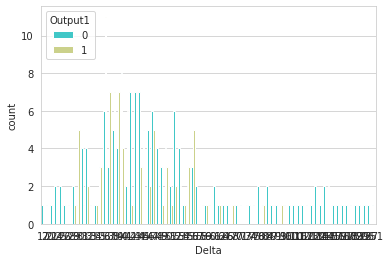

In [943]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [944]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

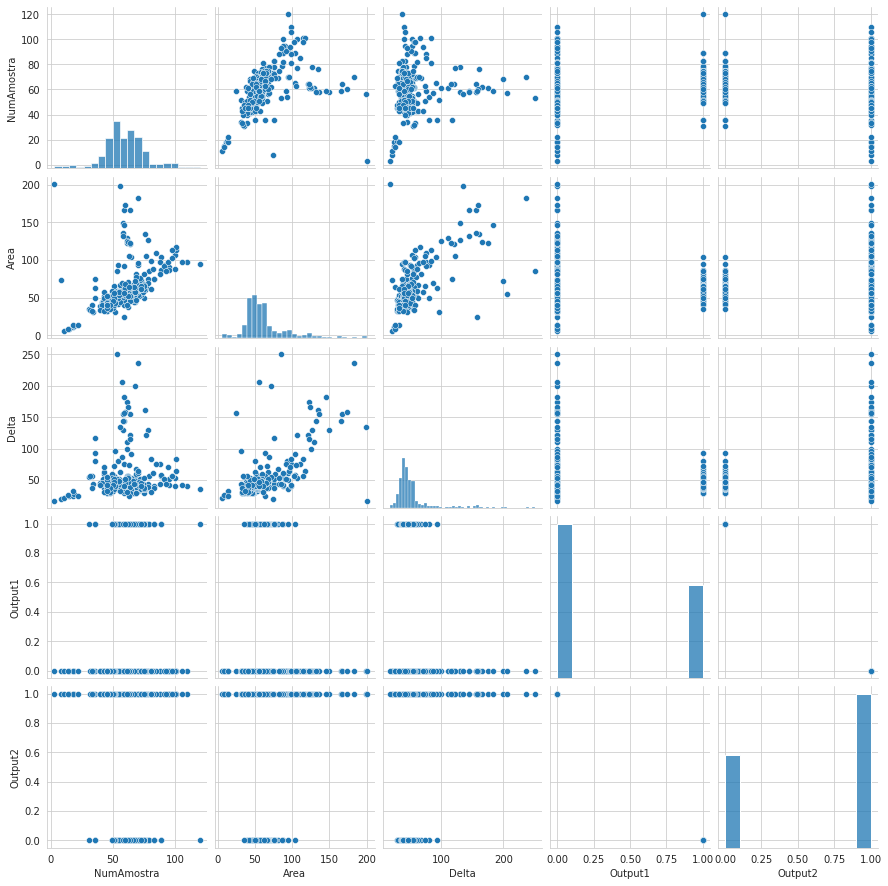

In [945]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

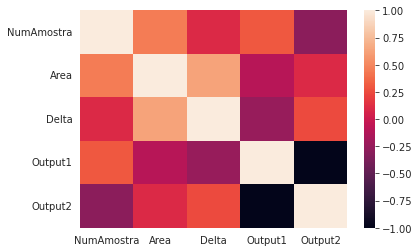

In [946]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [947]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])


In [948]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Output1,Output2
0,0.534314,0.565990,0.373528,1.289676,-1.289676
1,1.693069,0.762257,0.035312,1.289676,-1.289676
2,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [949]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [950]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
85         1        0
183        0        1
179        0        1
57         1        0
252        0        1

[92 rows x 2 columns]
     NumAmostra      Area     Delta
89     0.476377 -0.186366 -0.331089
212   -0.856191 -1.036855 -0.725675
218    1.229567 -0.088232 -0.669306
96    -1.667319 -0.938722  0.007127
88    -0.103000 -0.415344 -0.472013
..          ...       ...       ...
85     1.345443  0.369724 -0.500197
183    0.302564  1.318346  1.021776
179   -0.392689 -0.251788 -0.133796
57     0.534314 -0.153655 -0.443828
252   -1.493506 -1.069566 -0.302904

[92 rows x 3 columns]


## Criando o Modelo de MPL

In [951]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 8
N_output = 2
learnrate = 0.5

## Inicialização dos pesos da MPL (Aleatório)

In [952]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[ 0.0624047   0.00574502 -0.01542792  0.01367377  0.14981462 -0.14182757
  -0.23343562 -0.10313388]
 [-0.04563808 -0.02800706 -0.03533296  0.04306051  0.05098791  0.01951373
   0.02865977 -0.01199361]
 [-0.1476281   0.06008698 -0.11191922  0.02071848  0.01687909 -0.16246408
  -0.17192647  0.04930962]]
Pesos da Camada de Saída:
[[-0.10330242  0.13842658]
 [ 0.03012937  0.02900919]
 [-0.11054562  0.00648742]
 [-0.1013135   0.04928801]
 [ 0.04058546 -0.04858512]
 [ 0.04828955 -0.08953714]
 [ 0.0699966   0.16735907]
 [-0.04046296 -0.01629164]]


## Algoritmo Backpropagation

In [928]:
epochs = 200000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.2949385709663914
Erro quadrático no treinamento:  0.0011661924014255798
Erro quadrático no treinamento:  3.855889527811168e-05
Erro quadrático no treinamento:  2.1550289514172482e-06
Erro quadrático no treinamento:  2.2104597413046355e-07
Erro quadrático no treinamento:  3.359847582310552e-08
Erro quadrático no treinamento:  6.521447539509828e-09
Erro quadrático no treinamento:  1.4740908048928272e-09
Erro quadrático no treinamento:  3.71387187206187e-10
Erro quadrático no treinamento:  1.0356329592612808e-10
Erro quadrático no treinamento:  3.1984914141120317e-11
Erro quadrático no treinamento:  1.0859441403388062e-11
Erro quadrático no treinamento:  4.003004413107982e-12
Erro quadrático no treinamento:  1.5830345427483852e-12
Erro quadrático no treinamento:  6.65111123494314e-13
Erro quadrático no treinamento:  2.946086685400527e-13
Erro quadrático no treinamento:  1.367197420089766e-13
Erro quadrático no treinamento:  6.612941013187777e-14
Erro qua

In [929]:
### Gráfico da Evolução do Erro

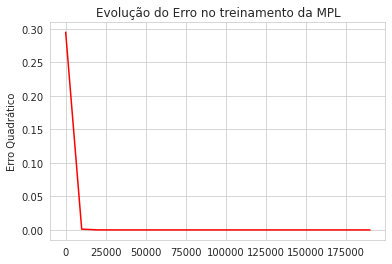

In [930]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [931]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 


A Acurácia da Predição é de: 0.870
